### This code provides statistical and graphical representation of temperature readings obtained from the field. 
#### Author: Thomas Robbins, Civil Engineer, Construction Engineering Group

##### Note: To properly use this code, please read the comments and bold text sections above each block of code. The comments are imbedded within the code block, and are identified in green and preceded by a hashtag '#'

In [1]:
# These 'import' codes bring in appropriate libraries needed to run the program

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import pylab

#### The below section of code imports the csv file containing the data. You will have to ensure that the file exists in the folder that this code is running in, and you will need to change the 'red' text in the code to match the file name of the data you want to import
#### If the 'Alarm' feature was used during the collection of temperature readings, you will remove the '#' before the last line of code in this block, and add a '#' before the 3rd line in this block. 

In [2]:
# Imports the data 'csv' file and skips the header section (first five, or Nine rows)

# Use this if there was no alarm event in the temp file
df = pd.read_csv('B582127E.csv', skiprows=range(0,4), date_parser = pd.to_datetime)

# use this if there was an alarm event in temp file
# df = pd.read_csv('B582127B.csv', skiprows=range(0,8), date_parser = pd.to_datetime)

#### Due to the temperature device reading in C, the following code changes the temp to F. 

In [3]:
# This code replaces Celsius to Fahrenheit in column 1. 
# If you need to change to any other column, then just change red 'P1' to new column name

def f(x):
    x = (x * 1.8) + 32
    return float(x)

df['P1'] = df['P1'].apply(f)

In [4]:
# This code just shows you what the first four rows look like. 
df[0:4]

,P1,P2,Time,Date
0,73.688,0.0,21:45,12/19/18
1,73.544,0.0,21:30,12/19/18
2,73.130,0.0,21:15,12/19/18
3,50.900,0.0,21:00,12/19/18


In [5]:
# Provides a basic statistical analysis on all the temperature readings
# Count = total temperature readings
# Mean = Average temperature
# min = minimum temperature
df.describe()

,P1,P2
count,508.000000,508.0
mean,67.836016,0.0
std,5.500570,0.0
min,41.162000,0.0
25%,66.866000,0.0
50%,69.269000,0.0
75%,71.055500,0.0
max,75.578000,0.0


In [6]:
# Same as above code, only in different format

# Average of all temp values
print('mean = ', np.mean(df['P1'], axis=0))

# minimum of all temperature values
print('minimum =',np.min(df['P1'], axis=0))

# maximum of all temperature values
print('maximum =',np.max(df['P1'], axis=0))

('mean = ', 67.8360157480316)
('minimum =', 41.162)
('maximum =', 75.578)


In [7]:
# finds all temperature values less than BOR required 50 degree temps
# and performs general statistics on those data points. 
TempCount = df.loc[df['P1'] <= 50]
TempCount.describe()

# Note: If no values are less then BoR prescribed value, then 'NaN' will show in table. 

,P1,P2
count,9.000000,9.0
mean,44.894000,0.0
std,3.891831,0.0
min,41.162000,0.0
25%,41.720000,0.0
50%,42.098000,0.0
75%,48.272000,0.0
max,49.820000,0.0


#### The following code provides a graphical representation of all the days, and temperatures that are listed in the file.

12/14/18
12/15/18
12/16/18
12/17/18
12/18/18
12/19/18


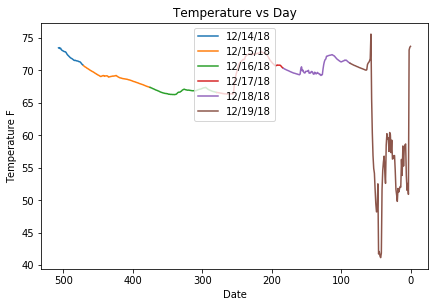

In [8]:
# This produces a graph to represent the entire period, in days, temperature was recorded. 
# To export this graph 'right-click' on the figure and 'save picture as' 

cnt = 0
fig, ax = plt.subplots()
for sample, data in df.groupby('Date'):
    print(sample) # access to sample name
    cnt = cnt+1
    data['P1'].plot(label=sample) # process sample records
    # ax = fig.add_subplot(5,5,cnt)
    # ax.plot(df['Time'], df[['P1']])
    # ax.set_title(sample)

plt.tight_layout()
plt.title('Temperature vs Day')
plt.xlabel('Date')
plt.ylabel('Temperature F')
pylab.legend(loc='upper center')
plt.gca().invert_xaxis()
plt.show()

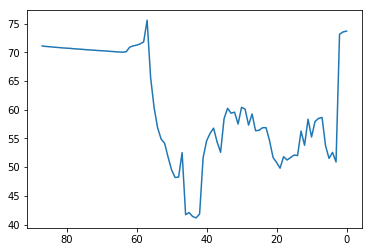

In [10]:
# Field values
g = df.groupby(['Date'])
Field = g.get_group('12/19/18')
plt.gca().invert_xaxis()
Field['P1'].plot()